In [4]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/4e/ba/ce9bd1cd4953336a0e213b29cb80bb11816f2a93de8c99f88ef0b446ad0c/scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB 435.7 kB/s eta 0:00:22
   ---------------------------------------- 0.0/9.2 MB 393.8 kB/s eta 0:0


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\C-ROAD\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import sklearn
assert sklearn.__version__ >= "0.20"

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(104) #any number can be used

In [2]:
laundry = pd.read_csv('transactions.csv')

In [4]:
laundry.head()

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID
0,1,6456,9069,TRANSFER,465.05,0,False,-1
1,2,7516,9543,TRANSFER,564.64,0,False,-1
2,3,2445,9356,TRANSFER,598.94,0,False,-1
3,4,2576,4617,TRANSFER,466.07,0,False,-1
4,5,3524,1773,TRANSFER,405.63,0,False,-1


In [7]:
frauds = laundry["IS_FRAUD"].value_counts()

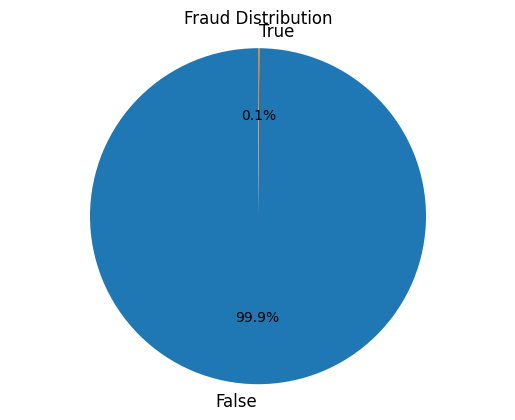

In [8]:
# Plotting the pie chart
plt.pie(frauds, labels=frauds.index, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that the pie is drawn as a circle.
plt.axis('equal')

# Adding a title
plt.title('Fraud Distribution')

# Display the pie chart
plt.show()

In [9]:
laundry.describe()

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_AMOUNT,TIMESTAMP,ALERT_ID
count,1.323234e+06,1.323234e+06,1.323234e+06,1.323234e+06,1.323234e+06,1.323234e+06
mean,6.616175e+05,6.026110e+03,6.805872e+03,1.159882e+05,9.997826e+01,-7.284003e-01
std,3.819849e+05,2.919641e+03,2.845101e+03,1.320091e+06,5.752707e+01,8.594027e+00
min,1.000000e+00,1.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,3.308092e+05,3.610000e+03,4.665000e+03,2.393000e+01,5.000000e+01,-1.000000e+00
50%,6.616175e+05,6.534000e+03,7.585000e+03,1.567100e+02,1.000000e+02,-1.000000e+00
75%,9.924258e+05,8.691000e+03,9.355000e+03,4.400000e+02,1.500000e+02,-1.000000e+00
max,1.323234e+06,9.999000e+03,9.999000e+03,2.147484e+07,1.990000e+02,3.990000e+02


In [11]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/2d/46/cf3fce41ffc543b6e94dadbe6b647559d591df446ec716e72c3b4ce71b34/seaborn-0.13.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.8 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.8 kB 435.7 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.8 kB 326.8 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.8 kB 656.4 kB/s eta 0:00:01
   ------------------------- ------------ 194.6/294.8 kB 841.6 kB/s eta 0:00:01
   ----------------------------- -------- 225.3/294.8 kB 919.0 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/294.8 kB 793.0 kB/s eta 0:00:01
   -------------------------------------- 294.8/294.8 kB 827.1 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\C-ROAD\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [15]:
laundry.drop_duplicates(inplace=True)

In [17]:
X = laundry.drop(["IS_FRAUD"],axis=1)
X = X.drop(["ALERT_ID"],axis=1)
y = laundry["IS_FRAUD"]

In [18]:
y.value_counts()

IS_FRAUD
False    1321515
True        1719
Name: count, dtype: int64

In [21]:
X = X.drop(["TX_TYPE"],axis=1)

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323234 entries, 0 to 1323233
Data columns (total 5 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   TX_ID                1323234 non-null  int64  
 1   SENDER_ACCOUNT_ID    1323234 non-null  int64  
 2   RECEIVER_ACCOUNT_ID  1323234 non-null  int64  
 3   TX_AMOUNT            1323234 non-null  float64
 4   TIMESTAMP            1323234 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 50.5 MB


([<matplotlib.axis.XTick at 0x1215ac32550>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

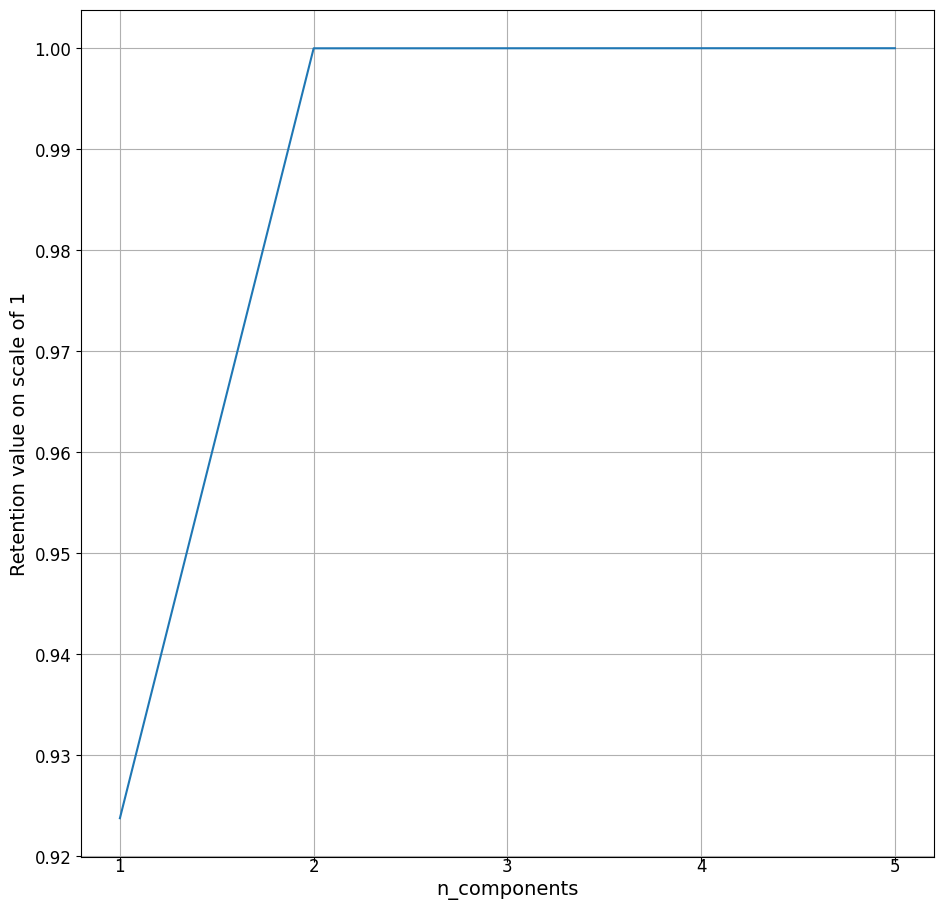

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
pca.fit_transform(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(11,11))
plt.xticks(ha='center', va='center')
plt.plot(np.arange(1, len(cumsum)+1), cumsum)
#plt.plot(cumsum)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Retention value on scale of 1')
plt.xticks(np.arange(1, len(cumsum)+1))

In [27]:
!pip install imblearn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
   ---------- ---------------------------- 61.4/235.6 kB 656.4 kB/s eta 0:00:01
   ------------------------ --------------- 143.4/235.6 kB 1.2 MB/s eta 0:00:01
   ---------------------------- --------- 174.1/235.6 kB 952.6 kB/s eta 0:00:01
   ---------------------------------------- 235.6/235.6 kB 1.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\C-ROAD\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [38]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.30, shuffle=True, stratify=y)

# Undersampling the majority class using RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

undersampler = RandomUnderSampler(random_state=42)
X_resampled_test, y_resampled_test = undersampler.fit_resample(X_test, y_test)

# Now X_resampled and y_resampled contain the undersampled data

# You can check the class distribution after undersampling
print(pd.Series(y_resampled).value_counts())

# Continue with your machine learning model training using the undersampled data

IS_FRAUD
False    1203
True     1203
Name: count, dtype: int64


In [39]:
y_resampled.value_counts()

IS_FRAUD
False    1203
True     1203
Name: count, dtype: int64

In [40]:
y_resampled_test.value_counts()

IS_FRAUD
False    516
True     516
Name: count, dtype: int64

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score


# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs = -1)

# Train the classifier on the undersampled training data
rf_classifier.fit(X_resampled, y_resampled)

# Predictions on the undersampled test set
y_pred = rf_classifier.predict(X_resampled_test)

# Evaluate the performance on the test set
accuracy = accuracy_score(y_resampled_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Additional evaluation metrics
print(classification_report(y_resampled_test, y_pred))

# Optionally, you can perform cross-validation on the entire undersampled dataset
# scores = cross_val_score(rf_classifier, X_resampled, y_resampled, cv=5)
# print(f'Cross-validated Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})')


Accuracy: 0.95
              precision    recall  f1-score   support

       False       0.97      0.92      0.95       516
        True       0.92      0.97      0.95       516

    accuracy                           0.95      1032
   macro avg       0.95      0.95      0.95      1032
weighted avg       0.95      0.95      0.95      1032



In [46]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs = -1)

# Train the classifier on the undersampled training data
rf_classifier.fit(X_train, y_train)

# Predictions on the undersampled test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Additional evaluation metrics
print(classification_report(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    396455
        True       1.00      0.77      0.87       516

    accuracy                           1.00    396971
   macro avg       1.00      0.88      0.93    396971
weighted avg       1.00      1.00      1.00    396971



In [47]:
rf_classifier

RandomForestClassifier(n_jobs=-1, random_state=42)

In [48]:
# Assuming your model is stored in the variable 'model'
import joblib

# Save the model to a file
joblib.dump(rf_classifier, 'money_laundering_model.joblib')



['money_laundering_model.joblib']